# Predicting Car Prices

### Problem Statement
Build a K-Nearest Neighbor Model to predict a car's market price using its attributes. 
### Dataset
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

The imports-85.data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

#### Sources
https://archive.ics.uci.edu/ml/datasets/automobile

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

#### Creator/Donor: 
Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)


### Data Wrangling
load libraries and import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("/Users/matt/Desktop/DS/Jupyter_Notebooks/Predicting_Car_Prices/imports-85.data", names = cols)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
cars.columns = cars.columns.str.replace('-', '_', regex=True)
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Replace " ? " in DataFrame

In [5]:
cars.replace({'?': np.nan}, inplace=True)

### Convert 'num_of_cylinders' from string to integer

In [6]:
cars['num_of_cylinders'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)
cars['num_of_cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_of_cylinders, dtype: int64

### Convert 'num_of_doors' from string to integer

In [7]:
cars['num_of_doors'].replace({'two': 2, 'four': 4}, inplace=True)
cars['num_of_doors'].value_counts()

4.0    114
2.0     89
Name: num_of_doors, dtype: int64

In [8]:
cols_to_convert = ['normalized_losses', 'peak_rpm', 'horsepower', 'stroke', 'bore', 'price']
cars[cols_to_convert] = cars[cols_to_convert].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    float64
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

### inspect data types, null values, and summary statistics:

In [9]:
def data_eda(df):
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

data_eda(cars)

,null_sum,null_pct,dtypes,count,mean,median,min,max
aspiration,0,0.000000,object,205,NaN,NaN,std,turbo
body_style,0,0.000000,object,205,NaN,NaN,convertible,wagon
bore,4,0.019512,float64,201,3.329751,3.31,2.54,3.94
city_mpg,0,0.000000,int64,205,25.219512,24.00,13,49
compression_rate,0,0.000000,float64,205,10.142537,9.00,7,23
curb_weight,0,0.000000,int64,205,2555.565854,2414.00,1488,4066
drive_wheels,0,0.000000,object,205,NaN,NaN,4wd,rwd
engine_location,0,0.000000,object,205,NaN,NaN,front,rear
engine_size,0,0.000000,int64,205,126.907317,120.00,61,326
engine_type,0,0.000000,object,205,NaN,NaN,dohc,rotor


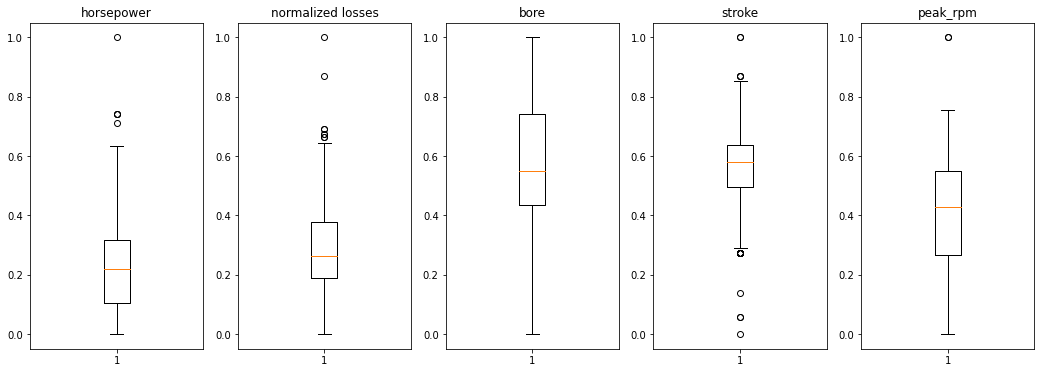

In [30]:
#np.warnings.filterwarnings('ignore')
fig, ax = plt.subplots(1, 5, figsize=(18,6))

ax[0].boxplot(cars['horsepower'])
ax[0].set_title('horsepower')
ax[1].boxplot(cars['normalized_losses'])
ax[1].set_title('normalized losses')
ax[2].boxplot(cars['bore'])
ax[2].set_title('bore')
ax[3].boxplot(cars['stroke'])
ax[3].set_title('stroke')
ax[4].boxplot(cars['peak_rpm'])
ax[4].set_title('peak_rpm')

plt.show()

### Impute Missing Data for Relevant Columns

In [11]:
normalized_loss_median = cars['normalized_losses'].median()
horsepower_median = cars['horsepower'].median()
bore_mean= cars['bore'].mean()
stroke_median = cars['stroke'].median()
peak_rpm_median = cars['peak_rpm'].median()


cars['normalized_losses'].fillna(normalized_loss_median, inplace=True)
cars['horsepower'].fillna(horsepower_median, inplace=True)
cars['bore'].fillna(bore_mean, inplace=True)
cars['stroke'].fillna(stroke_median, inplace=True)
cars['peak_rpm'].fillna(peak_rpm_median, inplace=True)

In [12]:
cols_to_keep = ['symboling', 'normalized_losses', 'wheel_base', 'num_of_cylinders', 'engine_size', 'horsepower', 'bore', 'stroke', 'compression_rate', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[cols_to_keep]

In [13]:
cars = cars.dropna(axis=0) # drop 4 'price' rows that contain NaN values
cars_na = cars[cars.isna().any(axis=1)] # check to see if there are any NaN values left
cars_na

,symboling,normalized_losses,wheel_base,num_of_cylinders,engine_size,horsepower,bore,stroke,compression_rate,peak_rpm,city_mpg,highway_mpg,price


In [14]:
print(cars.shape)
cars.head()

(201, 13)


,symboling,normalized_losses,wheel_base,num_of_cylinders,engine_size,horsepower,bore,stroke,compression_rate,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,88.6,4,130,111.0,3.47,2.68,9.0,5000.0,21,27,13495.0
1,3,115.0,88.6,4,130,111.0,3.47,2.68,9.0,5000.0,21,27,16500.0
2,1,115.0,94.5,6,152,154.0,2.68,3.47,9.0,5000.0,19,26,16500.0
3,2,164.0,99.8,4,109,102.0,3.19,3.40,10.0,5500.0,24,30,13950.0
4,2,164.0,99.4,5,136,115.0,3.19,3.40,8.0,5500.0,18,22,17450.0


### Create a Heatmap to understand correlations between features

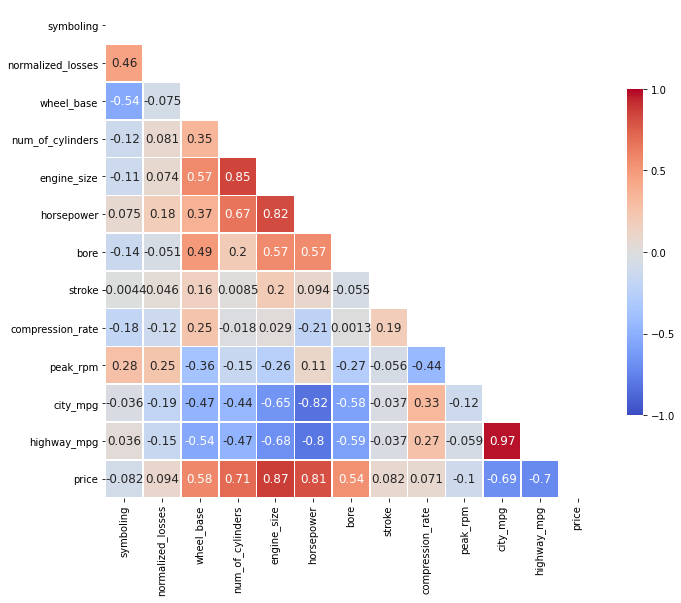

In [15]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = cars.corr()

# Setup Mask to hide the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
# Set the upper triangle to True
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# reference: https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

based on the heatmap, it appears that the following features have the highest positive correlation with 'price':
1. engine_size
2. horsepower
3. num_of_cylinders
4. wheel_base
5. bore

### Normalize data

In [16]:
price_col = cars['price'] # preserve price column
cars = ((cars - cars.min()) / (cars.max() - cars.min())) # normalize
cars['price'] = price_col # add price back to df
print(cars.head())
print(cars.shape)
print(201 / 3)

   symboling  normalized_losses  wheel_base  num_of_cylinders  engine_size  \
0        1.0           0.261780    0.058309               0.2     0.260377   
1        1.0           0.261780    0.058309               0.2     0.260377   
2        0.6           0.261780    0.230321               0.4     0.343396   
3        0.8           0.518325    0.384840               0.2     0.181132   
4        0.8           0.518325    0.373178               0.3     0.283019   

   horsepower      bore    stroke  compression_rate  peak_rpm  city_mpg  \
0    0.294393  0.664286  0.290476            0.1250  0.346939  0.222222   
1    0.294393  0.664286  0.290476            0.1250  0.346939  0.222222   
2    0.495327  0.100000  0.666667            0.1250  0.346939  0.166667   
3    0.252336  0.464286  0.633333            0.1875  0.551020  0.305556   
4    0.313084  0.464286  0.633333            0.0625  0.551020  0.138889   

   highway_mpg    price  
0     0.289474  13495.0  
1     0.289474  16500.0  
2 

### Randomize Dataset and Separate into Train and Test Dataframes

In [17]:
# Randomize the dataset
from sklearn.utils import shuffle
cars_r = shuffle(cars, random_state=1).reset_index(drop=True)

# Split into train and test
one_third = len(cars_r) // 3
two_thirds = len(cars_r) - one_third
train_df = cars_r.iloc[ : two_thirds]
test_df = cars_r.iloc[two_thirds : ]

print(train_df.shape)
train_df.head()

(134, 13)


,symboling,normalized_losses,wheel_base,num_of_cylinders,engine_size,horsepower,bore,stroke,compression_rate,peak_rpm,city_mpg,highway_mpg,price
0,0.4,0.214660,0.309038,0.2,0.222642,0.228972,0.564286,0.666667,0.09375,0.428571,0.388889,0.473684,9549.0
1,0.6,0.465969,0.206997,0.2,0.109434,0.093458,0.307143,0.552381,0.15000,0.551020,0.500000,0.578947,6229.0
2,0.4,0.261780,0.355685,0.2,0.230189,0.168224,0.607143,0.628571,0.10000,0.265306,0.361111,0.421053,10245.0
3,0.4,0.068063,0.288630,0.2,0.116981,0.130841,0.271429,0.638095,0.13750,0.755102,0.472222,0.473684,7295.0
4,0.8,0.361257,0.344023,0.2,0.320755,0.317757,0.771429,0.680952,0.14375,0.265306,0.305556,0.368421,9989.0


In [18]:
print(test_df.shape)
test_df.head()

(67, 13)


,symboling,normalized_losses,wheel_base,num_of_cylinders,engine_size,horsepower,bore,stroke,compression_rate,peak_rpm,city_mpg,highway_mpg,price
134,0.4,0.225131,0.402332,0.4,0.452830,0.485981,0.635714,0.571429,0.12500,0.428571,0.166667,0.236842,13499.0
135,1.0,0.261780,0.084548,0.4,0.501887,0.742991,0.857143,0.395238,0.15625,0.714286,0.111111,0.236842,37028.0
136,0.6,0.434555,0.206997,0.2,0.109434,0.093458,0.307143,0.552381,0.15000,0.551020,0.500000,0.578947,6229.0
137,0.4,0.261780,0.276968,0.2,0.267925,0.219626,0.657143,0.871429,0.10625,0.428571,0.277778,0.394737,9295.0
138,0.8,0.664921,0.425656,0.2,0.177358,0.247664,0.685714,0.347619,0.11250,0.673469,0.277778,0.342105,16430.0


### Univariate K - Nearest Neighbor Model

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col_name, target_col_name):
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col_name]], train_df[target_col_name])
    predictions = knn.predict(test_df[[training_col_name]])
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [20]:
training_cols = train_df.columns.drop('price')
univariate_rmse = {}

for col in training_cols:
    rmse_value = knn_train_test(col, 'price')
    univariate_rmse[col] = rmse_value

minimum_rmse = min(univariate_rmse.items(), key=lambda x: x[1]) 
print(f"the top performing attribute with k=5 for the univariate KNN model is {minimum_rmse}")
print('\n')
univariate_rmse

the top performing attribute with k=5 for the univariate KNN model is ('engine_size', 3092.3264727917003)




{'symboling': 8036.240937897538,
 'normalized_losses': 7612.702130267485,
 'wheel_base': 5092.266084487719,
 'num_of_cylinders': 5433.108114668034,
 'engine_size': 3092.3264727917003,
 'horsepower': 4408.421873925799,
 'bore': 7613.920906167408,
 'stroke': 7623.296474251041,
 'compression_rate': 5750.318548528615,
 'peak_rpm': 7054.524901823493,
 'city_mpg': 4887.681857761057,
 'highway_mpg': 5036.329813094915}

### Univariate Model with Different K-Values

Now let's experiment with different k-values to see which one performs best.

In [21]:
def knn_train_test_plus_k_value(training_col_name, target_col_name):
    k_vals = [1, 3, 5, 7, 9]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[training_col_name]], train_df[target_col_name])
        predictions = knn.predict(test_df[[training_col_name]])
        mse = mean_squared_error(test_df[target_col_name], predictions)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

for col in training_cols:
    rmse_value = knn_train_test_plus_k_value(col, 'price')
    univariate_rmse[col] = rmse_value
    
univariate_rmse

{'symboling': {1: 9421.393007089231,
  3: 8036.29445467182,
  5: 8036.240937897538,
  7: 8599.211559268675,
  9: 8160.178728685911},
 'normalized_losses': {1: 7047.120266092818,
  3: 7923.362636071037,
  5: 7612.702130267485,
  7: 7705.225385571869,
  9: 7539.259302631783},
 'wheel_base': {1: 2865.326919953281,
  3: 4128.426607928024,
  5: 5092.266084487719,
  7: 5486.275512058486,
  9: 5665.856283467882},
 'num_of_cylinders': {1: 6007.597616302459,
  3: 5429.084381113182,
  5: 5433.108114668034,
  7: 5523.5900847738185,
  9: 5809.7136419321905},
 'engine_size': {1: 2966.915298430291,
  3: 2905.336174221576,
  5: 3092.3264727917003,
  7: 3519.6399122769076,
  9: 3692.3316987626013},
 'horsepower': {1: 3792.823303548466,
  3: 4200.271307473453,
  5: 4408.421873925799,
  7: 4443.120516501294,
  9: 4748.324744313992},
 'bore': {1: 11692.85503547346,
  3: 7780.230983879638,
  5: 7613.920906167408,
  7: 7745.649245514644,
  9: 7726.246116700656},
 'stroke': {1: 10575.301227846963,
  3: 7520

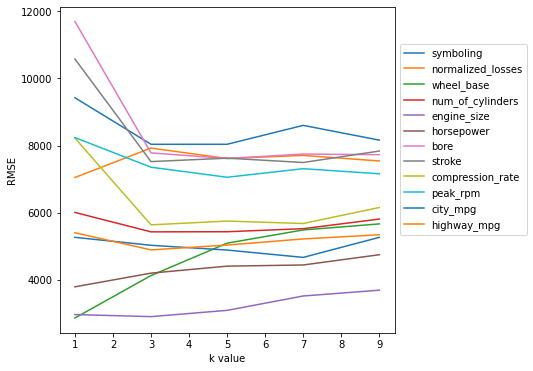

In [22]:
plt.figure(figsize=(6,6))
for k,v in univariate_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    
    plt.plot(x,y, label='{}'.format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.0, .9))

### Feature Selection

In [23]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in univariate_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3235.309911
horsepower           4318.592349
wheel_base           4647.630282
city_mpg             5023.521487
highway_mpg          5178.238753
num_of_cylinders     5640.618768
compression_rate     6288.079977
peak_rpm             7422.646626
normalized_losses    7565.533944
stroke               8209.742629
symboling            8450.663738
bore                 8511.780458
dtype: float64


The 5 highest performing features appear to be:

1. engine_size
2. horsepower
3. wheel_base
4. city_mpg
5. highway_mpg

### Multivariate K - Nearest Neighbor Model

In [24]:
def knn_train_test_multi(training_cols, target_col_name):
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_cols], train_df[target_col_name])
    predictions = knn.predict(test_df[training_cols])
    mse = mean_squared_error(test_df[target_col_name], predictions)
    rmse = np.sqrt(mse)
    return rmse

multi_var_rmse = {}

top_2 = ['engine_size', 'horsepower']
top_3 = ['engine_size', 'horsepower', 'wheel_base']
top_4 = ['engine_size', 'horsepower', 'wheel_base', 'city_mpg']
top_5 = ['engine_size', 'horsepower', 'wheel_base', 'city_mpg', 'highway_mpg']

multi_params = [top_2, top_3, top_4, top_5]
labels = ['top_2_features', 'top_3_features', 'top_4_features', 'top_5_features']

for i in range(4):
    rmse_value = knn_train_test_multi(multi_params[i], 'price')
    multi_var_rmse[labels[i]] = rmse_value
    
multi_var_rmse

{'top_2_features': 3081.636591551324,
 'top_3_features': 3586.5398971752497,
 'top_4_features': 3590.082213834323,
 'top_5_features': 3697.622931705534}

we see a sharp increase in RMSE when we add more than the top 2 features to the model.

### Experiment using different k-values

In [25]:
k_vals = [3, 4, 5, 6, 7]

def knn_train_test_multi_k(training_cols, target_col_name):
    k_vals_rmse = {}
    for i in range(len(k_vals)):
        knn = KNeighborsRegressor(n_neighbors=k_vals[i])
        knn.fit(train_df[training_cols], train_df[target_col_name])
        predictions = knn.predict(test_df[training_cols])
        mse = mean_squared_error(test_df[target_col_name], predictions)
        rmse = np.sqrt(mse)
        k_vals_rmse[k_vals[i]] = rmse
    return k_vals_rmse

multi_var_rmse_k = {}

top_2 = ['engine_size', 'horsepower']
top_3 = ['engine_size', 'horsepower', 'wheel_base']
top_4 = ['engine_size', 'horsepower', 'wheel_base', 'city_mpg']
top_5 = ['engine_size', 'horsepower', 'wheel_base', 'city_mpg', 'highway_mpg']

multi_params = [top_2, top_3, top_4, top_5]
labels = ['top_2_features', 'top_3_features', 'top_4_features', 'top_5_features']

for i in range(4):
    rmse_value = knn_train_test_multi_k(multi_params[i], 'price')
    multi_var_rmse_k[labels[i]] = rmse_value
    
multi_var_rmse_k

{'top_2_features': {3: 2965.3008659390653,
  4: 2925.581549217079,
  5: 3081.636591551324,
  6: 3334.454790703239,
  7: 3376.3701220446255},
 'top_3_features': {3: 3629.123450399851,
  4: 3500.8148258602146,
  5: 3586.5398971752497,
  6: 3737.269218319575,
  7: 3842.3884737710828},
 'top_4_features': {3: 3066.539386283588,
  4: 3433.0476888282014,
  5: 3590.082213834323,
  6: 3745.03835165806,
  7: 3770.7592011141583},
 'top_5_features': {3: 3069.261463881011,
  4: 3486.1050616601956,
  5: 3697.622931705534,
  6: 3765.0918069937165,
  7: 3904.999478787792}}

In [26]:
for params, k_vals in multi_var_rmse_k.items():
    print(params)
    for key in k_vals:
        minimums = min(k_vals.items(), key=lambda x: x[1]) 
    print(minimums)

top_2_features
(4, 2925.581549217079)
top_3_features
(4, 3500.8148258602146)
top_4_features
(3, 3066.539386283588)
top_5_features
(3, 3069.261463881011)


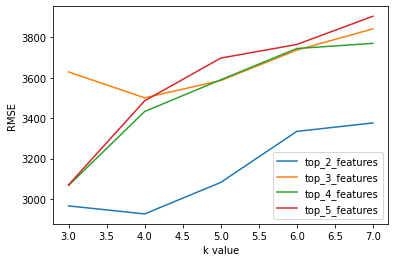

In [27]:
for k,v in multi_var_rmse_k.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

### Using K-Fold Cross Validation

In [28]:
# experimenting with a different number of folds:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [i for i in range(5,11)]
multi_params = [top_2, top_3, top_4, top_5]
labels = ['top_2_params', 'top_3_params', 'top_4_params', 'top_5_params']

def k_folds_multi_variate(training_cols, target_col):
    k_folds = {}
    std_dev = {}
    for i in range(len(num_folds)):
        kf = KFold(n_splits=num_folds[i])
        model = KNeighborsRegressor(n_neighbors=4)
        mses = cross_val_score(model, cars_r[training_cols], cars_r[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        k_folds[f"avg_rmse for {num_folds[i]} folds"] = avg_rmse
        std_dev[f"rmse std_dev for {num_folds[i]} folds"] = std_rmse
    return k_folds

k_folds_params = {}

for i in range(len(multi_params)):
    results = k_folds_multi_variate(multi_params[i], 'price')
    k_folds_params[f"for features {str(multi_params[i])}"] = results
    
k_folds_params

{"for features ['engine_size', 'horsepower']": {'avg_rmse for 5 folds': 2924.682699901046,
  'avg_rmse for 6 folds': 2907.921860348253,
  'avg_rmse for 7 folds': 2817.15979373861,
  'avg_rmse for 8 folds': 2890.477486642216,
  'avg_rmse for 9 folds': 2662.1295565016962,
  'avg_rmse for 10 folds': 2754.2237560142976},
 "for features ['engine_size', 'horsepower', 'wheel_base']": {'avg_rmse for 5 folds': 3148.718456273515,
  'avg_rmse for 6 folds': 3053.1925856912426,
  'avg_rmse for 7 folds': 3354.9991635951596,
  'avg_rmse for 8 folds': 3158.2943000871182,
  'avg_rmse for 9 folds': 3152.860402885062,
  'avg_rmse for 10 folds': 3124.9142488438492},
 "for features ['engine_size', 'horsepower', 'wheel_base', 'city_mpg']": {'avg_rmse for 5 folds': 3080.8771141278444,
  'avg_rmse for 6 folds': 2988.303754110291,
  'avg_rmse for 7 folds': 3197.1411147066506,
  'avg_rmse for 8 folds': 2976.0362377386555,
  'avg_rmse for 9 folds': 3055.5268781229565,
  'avg_rmse for 10 folds': 3014.617296350089

In [29]:
for params, folds in k_folds_params.items():
    print(params)
    for key in folds:
        minimums = min(folds.items(), key=lambda x: x[1]) 
    print(minimums)

for features ['engine_size', 'horsepower']
('avg_rmse for 9 folds', 2662.1295565016962)
for features ['engine_size', 'horsepower', 'wheel_base']
('avg_rmse for 6 folds', 3053.1925856912426)
for features ['engine_size', 'horsepower', 'wheel_base', 'city_mpg']
('avg_rmse for 8 folds', 2976.0362377386555)
for features ['engine_size', 'horsepower', 'wheel_base', 'city_mpg', 'highway_mpg']
('avg_rmse for 8 folds', 3000.848707992828)


### Conclusion

After building several models (Univariate, Multivariate) and experimenting with different features, it seems like the most accurate KNN model would use the top 2 features (engine_size & horsepower) to predict price. As far as hyperparameter tuning, I arrived at an optimal k_value of 4. I used k-fold cross validation to estimate the performance of the model using various folds and features. This confirms that we have selected the correct features for predicting price based on the given data.